# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [97]:
import numpy as np
from functools import reduce
import statistics as stat
from scipy import stats as st
from collections import Counter
import pandas as pd
import pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [5]:
temp= pd.read_csv(r'C:\Users\Oriana Ampuero\ironhack\semana5\5.1-lab-subsetting-and-descriptive-stats\your-code\Temp_States.csv')

#### Print `temp`

In [6]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [7]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [48]:
NY= temp.loc[temp['State'] == 'New York']
NY

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [15]:
NY.mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [78]:
mayor15= temp[temp['Temperature'] > 15]
mayor15.head()

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [51]:
city_mayor15= temp.City[df['Temperature'] >= 15]
city_mayor15

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [79]:
city_bet = temp[temp['Temperature'].between(15, 20)]
city_bet

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
6,Newark,New Jersey,20.000000


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [80]:
temp.groupby('State').mean()

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [46]:
employee= pd.read_csv(r'C:\Users\Oriana Ampuero\ironhack\semana5\5.1-lab-subsetting-and-descriptive-stats\your-code\employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [45]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

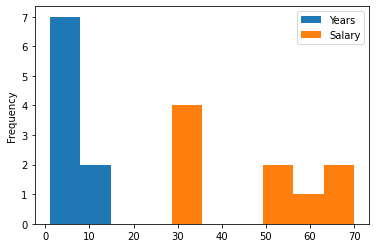

In [53]:
histogram= employee.plot.hist()

#### What's the average salary in this company?

In [61]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### What's the highest salary?

In [67]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### What's the lowest salary?

In [68]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### Who are the employees with the lowest salary?

In [81]:
sal_min = employee.sort_values(by= 'Salary')
sal_min

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
0,Jose,IT,Bachelor,M,analyst,1,35
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60
6,Carlos,IT,Master,M,VP,8,70
8,Ana,HR,Master,F,VP,8,70


#### Could you give all the information about an employee called David?

In [77]:
david= employee.loc[:, 'Name'] == 'David'
df_david = employee.loc[david]
df_david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [82]:
sal_david= employee[employee['Name'] == 'David']['Salary'].iloc[0]
sal_david

30

#### Print all the rows where job title is associate

In [85]:
title_asso= employee[employee['Title'] == 'associate']
title_asso

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [89]:
primero= employee.head(3)
primero

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [91]:
segundo= employee.iloc[:3, :]
segundo

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [92]:
sal_55= employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
sal_55

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [94]:
avr_group= employee.groupby('Years').mean()
avr_group

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [95]:
title_sal= employee.groupby('Title')['Salary'].mean()
title_sal

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

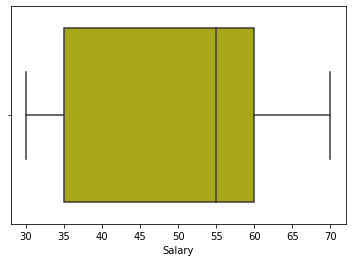

In [99]:
sns.boxplot(x=employee['Salary'], color='y');

In [100]:
employee.quantile(0.75)
employee.describe().T['75%']

Years      7.0
Salary    60.0
Name: 75%, dtype: float64

In [104]:
employee.quantile(0.25)
employee.describe().T['25%']

Years      2.0
Salary    35.0
Name: 25%, dtype: float64

#### Is the mean salary per gender different?

In [106]:
gender= employee.groupby('Gender').mean()['Salary']
gender

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [108]:
depart= employee.describe().T[['mean', 'min', 'max']]
depart

,mean,min,max
Years,4.111111,1.0,8.0
Salary,48.888889,30.0,70.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [114]:
orders= pd.read_csv(r'C:\Users\Oriana Ampuero\ironhack\semana5\5.1-lab-subsetting-and-descriptive-stats\your-code\Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [115]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [117]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


In [118]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# Cada fila contiene la compra de un artículo único independientemente de la cantidad

####  What is the average Purchase Price?

In [119]:
purchase= orders.UnitPrice.mean()
purchase

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [121]:
low_purchase= orders.UnitPrice.min()
low_purchase

0.0

In [123]:
high_purchase= orders.UnitPrice.max()
high_purchase

8142.75

#### Select all the customers we have in Spain

In [124]:
custo_spain= orders[orders['Country'] == 'Spain']
custo_spain.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [134]:
print("We have")

print(len(custo_spain.CustomerID.unique()))

print("customers")

We have
30
customers


#### Select all the customers who have bought more than 50 items ?

In [135]:
more_50 = orders.groupby('CustomerID')['InvoiceNo'].count()
more_50[more_50 > 50].head()

CustomerID
12347    182
12349     73
12352     85
12354     58
12356     59
Name: InvoiceNo, dtype: int64

#### Select orders from Spain that are above 50 items

#### Select all free orders

In [145]:
free= orders[orders.amount_spent == 0].head()
free

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [148]:
lunch= orders[orders.Description.str.contains('lunch bag')]
lunch.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [150]:
lunch_2011= orders[(orders.Description.str.contains('lunch bag')) & (orders.year == 2011)]
lunch_2011.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

#### Select all orders made in the month of August

In [154]:
aug= orders[orders.month == 8]
aug.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

#### What's the  average amount of money spent by country

In [156]:
avr_coun= orders.groupby('Country').mean().amount_spent
avr_coun.head()

Country
Australia    116.895620
Austria       25.624824
Bahrain       32.258824
Belgium       20.283772
Brazil        35.737500
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [158]:
expensive= orders.loc[orders.UnitPrice.idxmax(), 'Description']
expensive

'postage'

#### What was the average amount spent per year ?

In [159]:
expen_year= orders.groupby('year').mean().amount_spent
expen_year

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64